In [1]:
#Gaussian Proccess
from functools import reduce

import matplotlib.pyplot as plt
import numpy as np
from numpy import dot
from numpy.linalg import inv
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import PolynomialFeatures

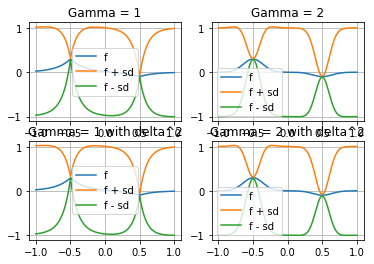

In [2]:
for i in range(4):
    g, l, d2, X, Y, s = i % 2 + 1, 0.2, 0.1 ** 2, np.array([-0.5, 0.5]), np.array([0.3, -0.1]), np.linspace(-1, 1, 500)
    k, d = lambda a, b: np.exp(-np.abs((a - b) / l) ** g), False if i < 2 else True
    ki, kx = lambda i, j: k(X[i], X[j]), lambda x: np.array([k(x, X[0]), k(x, X[1])])
    Z = np.linalg.inv(np.array([[ki(0, 0), ki(0, 1)], [ki(1, 0), ki(1, 1)]]) + d2 * np.identity(2))
    m = np.vectorize(lambda x: kx(x).dot(Z).dot(np.reshape(Y, (-1, 1))))(s)
    sd = np.vectorize(lambda x: 1 - kx(x).dot(Z).dot(kx(x).T) + (d2 if d else 0))(s)
    plt.subplot(221 + i)
    plt.plot(s, m, label='f')
    plt.plot(s, m + sd, label='f + sd')
    plt.plot(s, m - sd, label='f - sd')
    plt.title('Gamma = {}{}'.format(g, ' with delta^2' if d else ''))
    plt.legend()
    plt.grid()
plt.show()